## Deep Drowsiness Detection

In [4]:
!pip install torch torchvision

In [39]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [5]:
import torch
import torchvision

In [6]:
!pip install ultralytics

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Nauman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-16 Python-3.11.5 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Make Detections

In [10]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 3459.9ms pre-process, 281.3ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


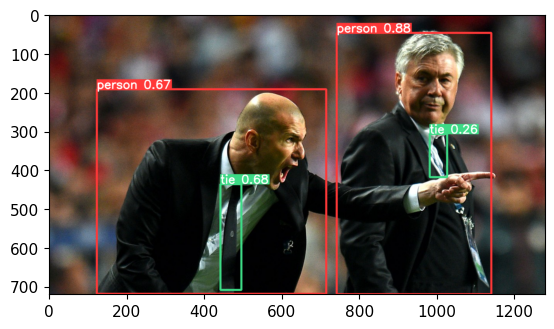

In [12]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.xyxy

[tensor([[7.42975e+02, 4.83956e+01, 1.14184e+03, 7.20000e+02, 8.81052e-01, 0.00000e+00],
         [4.42008e+02, 4.37522e+02, 4.96654e+02, 7.09974e+02, 6.75214e-01, 2.70000e+01],
         [1.23024e+02, 1.93287e+02, 7.15662e+02, 7.19724e+02, 6.65813e-01, 0.00000e+00],
         [9.82803e+02, 3.08417e+02, 1.02737e+03, 4.19987e+02, 2.60076e-01, 2.70000e+01]])]

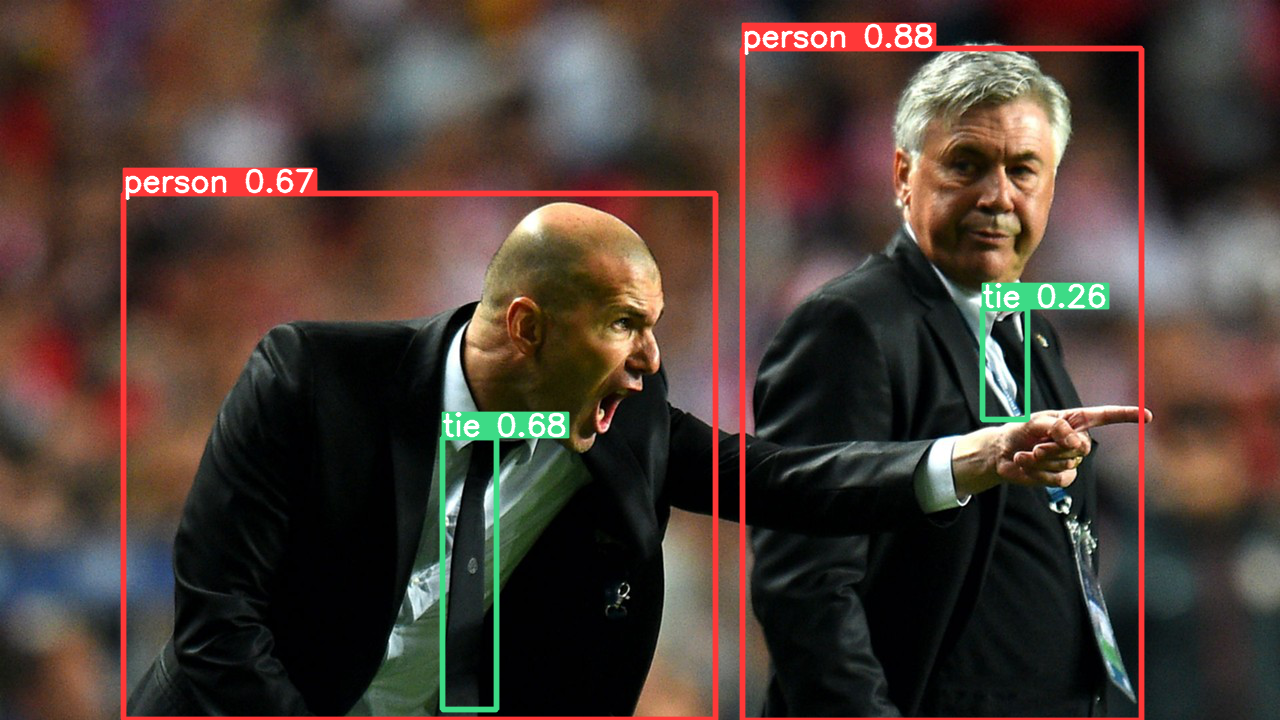

In [14]:
results.show()

In [15]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [16]:
np.array(results.render()).shape

(1, 720, 1280, 3)

In [17]:
results_2 = model("https://media.istockphoto.com/id/155287967/photo/cars-in-rush-hour-with-traffic-at-dawn.jpg?s=612x612&w=0&k=20&c=tDAaJQMHIh6nFDr0rJlD44tEtmj2srdpoSTKL7C5SGE=")
results_2.print()

image 1/1: 408x612 22 cars
Speed: 871.4ms pre-process, 199.3ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


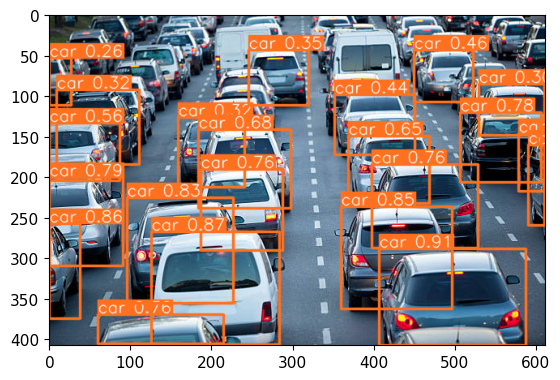

In [18]:
plt.imshow(np.squeeze(results_2.render()))

### Real Time Detections

In [27]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Train from scratch

In [28]:
import uuid # unique identifier
import os
import time

In [33]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
num_imgs = 20

In [34]:
cap = cv2.VideoCapture(0)

for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)
    
    for img_num in range(num_imgs):
        print("Collecting images for {}, image number {}".format(label, img_num))
        
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

In [37]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [38]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/5b/d6/e794d996dec76b773691af78390fe2f419ab7cb5b78a4df982e21ae655b7/lxml-5.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/8e/e2/d296cb17bae19ba49137a2649934a70d5f48cc99b7daa6ce9cf1aecddfeb/PyQt5_sip-12.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-Qt5>=5.15.2 from https://files.pythonhosted.org/packages/37/97/5d3b222b924fa2ed4c2488925155cd0b03fd5d09ee1cfcf7c553c11c9f66/PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB 1.3 MB/s eta 0:00:06
   - -

In [41]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-294-gdb125a20 Python-3.11.5 torch-2.2.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

### Load Model

In [63]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [64]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt', force_reload=True, device='cpu')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Nauman/.cache\torch\hub\master.zip
YOLOv5  2024-3-17 Python-3.11.5 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [65]:
img = os.path.join('data', 'images', 'drowsy.80604e99-e3c9-11ee-816c-8cf8c55c8fd1.jpg')

In [66]:
results = model(img)

In [67]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 25.0ms pre-process, 362.0ms inference, 7.3ms NMS per image at shape (1, 3, 480, 640)


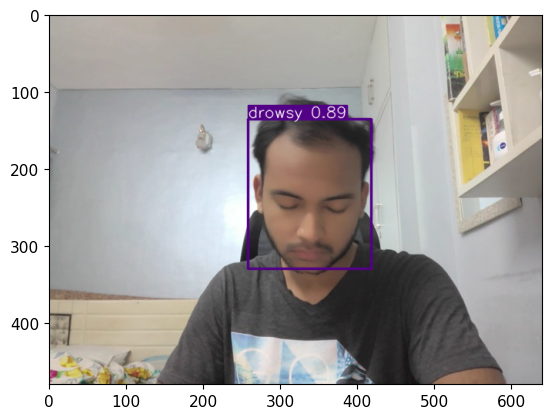

In [68]:
plt.imshow(np.squeeze(results.render()))

In [69]:
img_2 = os.path.join('data', 'images', 'awake.5b73df53-e3c9-11ee-b965-8cf8c55c8fd1.jpg')

In [70]:
results_2 = model(img_2)

In [71]:
results_2.print()

image 1/1: 480x640 1 awake
Speed: 24.4ms pre-process, 400.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


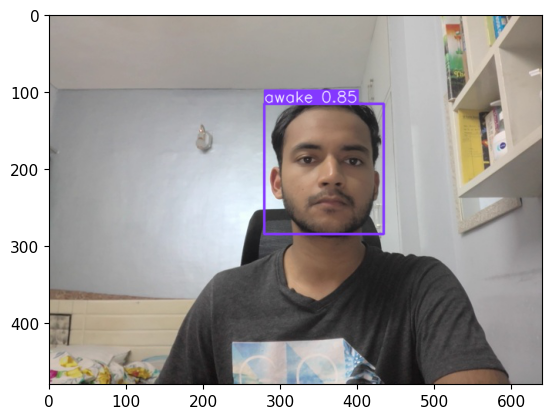

In [72]:
plt.imshow(np.squeeze(results_2.render()))

In [78]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()